# Importacion de librerias

In [21]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import tensorflow as tf
import os
import pathlib
import random
import IPython.display as display

# Configuraciones de TensorFlow

In [2]:
#Definimos esta variable para no usar la GPU si llega a estar ocupada
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [3]:
tf.enable_eager_execution()

In [4]:
#Comprobar que estoy ejecutandome en modo eagerly
tf.executing_eagerly()

True

In [5]:
#Log device placement corresponde a si yo quiero ver la informacion en donde se mapea o guardan las variables que creo
config = tf.ConfigProto(log_device_placement=True)

# Carga de Datos

In [10]:
!cd ../DataSets/UCF101 

flow  frames


In [13]:
data_root = pathlib.Path("../DataSets/UCF101")
data_root

PosixPath('../DataSets/UCF101')

In [14]:
for folder in data_root.iterdir():
    print(folder)

../DataSets/UCF101/flow
../DataSets/UCF101/frames


In [36]:
videos_rgb_path = list(data_root.glob('frames/*'))
#videos_rgb_path = [str(video) for video in videos_rgb_path]
len(videos_rgb_path)

13320

In [37]:
videos_rgb_path[:10]

[PosixPath('../DataSets/UCF101/frames/v_PlayingPiano_g24_c04'),
 PosixPath('../DataSets/UCF101/frames/v_RopeClimbing_g20_c02'),
 PosixPath('../DataSets/UCF101/frames/v_BlowingCandles_g18_c01'),
 PosixPath('../DataSets/UCF101/frames/v_Rowing_g05_c04'),
 PosixPath('../DataSets/UCF101/frames/v_Archery_g23_c07'),
 PosixPath('../DataSets/UCF101/frames/v_HeadMassage_g16_c04'),
 PosixPath('../DataSets/UCF101/frames/v_JumpingJack_g07_c04'),
 PosixPath('../DataSets/UCF101/frames/v_Shotput_g08_c07'),
 PosixPath('../DataSets/UCF101/frames/v_Skiing_g16_c04'),
 PosixPath('../DataSets/UCF101/frames/v_PlayingCello_g09_c05')]

In [43]:
video_path = random.choice(videos_rgb_path)
frames = list(video_path.glob('*'))
frames = [str(frame) for frame in frames]
print(video_path)

../DataSets/UCF101/frames/v_BasketballDunk_g09_c01


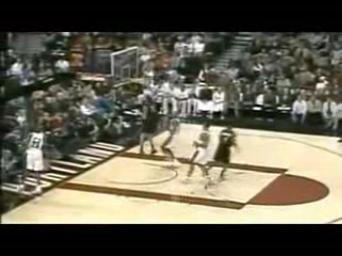

In [82]:
display.display(display.Image(random.choice(frames)))

In [76]:
label_names = sorted(item.name for item in videos_rgb_path if item.is_dir())
label_names = [clase.split("_")[1] for clase in label_names]

#Extraccion de todos los tipos de clases en un vector de python
clases = []
for clase in label_names:
    if clase not in clases:
        clases.append(clase)

#label_names, __ = tf.unique(label_names)
label_names = clases
label_names [:10]

['ApplyEyeMakeup',
 'ApplyLipstick',
 'Archery',
 'BabyCrawling',
 'BalanceBeam',
 'BandMarching',
 'BaseballPitch',
 'BasketballDunk',
 'Basketball',
 'BenchPress']

In [83]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
len(label_to_index)

101

In [78]:
label_names[0]

'ApplyEyeMakeup'

In [81]:
videos_labels = [label_to_index[item.name.split("_")[1]] for item in videos_rgb_path]
videos_labels[:10]

[63, 74, 13, 75, 2, 38, 47, 78, 80, 58]

### Como cargar los videos usando la libreria de tensorflow

In [90]:
videos_rgb = []
for video_path in videos_rgb_path:
    video = []
    for frame_path in sorted(list(video.glob('*'))):
        frame_raw = tf.io.read_file(str(frame_path))
        

PosixPath('../DataSets/UCF101/frames/v_PlayingPiano_g24_c04/frame000140.jpg')

In [111]:
frame_raw = tf.io.read_file(str(sorted(list(videos_rgb_path[0].glob('*')))[0]))
frame_tensor = tf.image.decode_image(frame_raw, channels=3)
frame_tensor = tf.image.resize(frame_tensor,[112,112])
frame_tensor.shape

TensorShape([Dimension(112), Dimension(112), Dimension(3)])

In [107]:
str(sorted(list(videos_rgb_path[0].glob('*')))[0])

'../DataSets/UCF101/frames/v_PlayingPiano_g24_c04/frame000001.jpg'

# Red Neuronal